# Classifying Data with Logistic regression in python

## Learning Objectives

Logistic regression is one of the most simplest and most commonly used classification approaches in machine learning. Logistic regression allows us to model the relationship between independent variables and the probability of categorical response (such as true or false/ Yes or no). By the end of this notebook, you will have learned:

+ How to import, export and prepare data. 
+ How to build a logistic regression model 
+ How to evaluate a logistic regression model 
+ How to interpret the coefficients of a logistic regression model

# Load the data

to load the data pandas package is used hear, other alterntives are csv reader and open with functions 

Import the data to a dataframe using read csv function 

In [3]:
import pandas as pd
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


Data set has two columns Income and Loan Amount and the categorical response named as default 

# Explore the data and its distribution 

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


It has 30 rows and Income and Loan Amounts have no nulls 

As well as response Default has also got no nulls 



In [5]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


Income varies from 12 to 34 
Loan amount varies from 8 to 110

## BoxPlot for better visualization 

Below is box plot with response on x axis and Income on Y axis

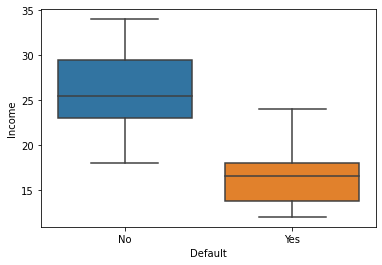

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

For people with around 25-30 are defaulted to no and people with income around 13-18 are being defaulted to Yes as per the above plot.


Lets visualize the same box plot with response on x axis and Loan amount on y axis

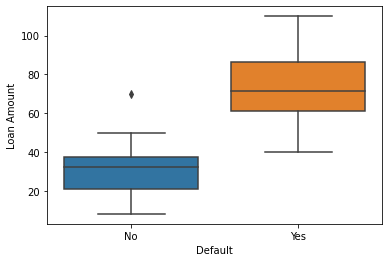

In [8]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

with Loan amount requested around 21-38 are defaulted to no and wuth loan request amount about 60-85 are being defaulted to yes. With an outlier for No of about 70 loan amount 

Lets evauate the visualization using scatter plot as well

## Scatterplot 



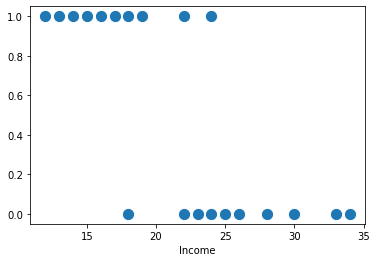

In [9]:
import numpy as np
ax = sns.scatterplot(x = loan['Income'], 
                     y = np.where(loan['Default'] == 'No', 0, 1), 
                     s = 150)

Loan defaults to No moxtly if the income is greater than 20 and defaults to yes mostly below 20. very similar to box plot analysis

Below is scatter plot between loan amount and response as default

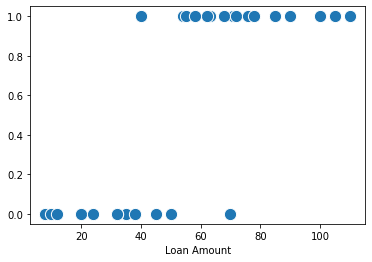

In [10]:
ax = sns.scatterplot(x = loan['Loan Amount'], 
                     y = np.where(loan['Default'] == 'No', 0, 1), 
                     s = 150)

From the above scatter plot with respect to loan amount below 50 requested mostly defaults to yes and greater than 50 defaults to no. 

# Preparing the data

lets start by seperating the variables and clasification response. 
Variables to be X and reponse to be Y

In [11]:
y = loan['Default']
X = loan[['Income', 'Loan Amount']]

Using sklearn package to determine and build model 
Determining 70% of data set to be trained and rest 30% used for test classification 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    stratify = y,
                                                    random_state = 123)

In [14]:
X_test

,Income,Loan Amount
23,17,76
12,18,24
14,17,63
28,22,105
29,14,110
2,33,12
13,25,32
6,23,35
27,16,100


It can be observed that data sampling is done randomely as specified. 

# Moving to Training and Evaluating 

Same sklearn package is used for training and evaluating 

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

A logistic regression classifier model is specified to a classifier variable 

In [17]:
model = classifier.fit(X_train, y_train)

A model is trained with the mentioned classifier for training dataset and assigned to model variable 

Lets proceed to test the model with test dataset

In [18]:
model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

Above is the result of the model classification from the dataset training specified. 

Lets proceed to compare it with the actual output

In [19]:
model.score(X_test, y_test)

0.8888888888888888

It says that 88.88% accuracy is observed which is 8 out of 9 are predicted accurately 

Lets proceed to evaluate in detail 

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[3, 1],
       [0, 5]], dtype=int64)

model predicted 3 out of 4 Yes defaults correctly and 5 out of 5 default no correctly.  

# Interpreting the model 

Starting with intercept of the model

In [22]:
model.intercept_

array([15.4670632])

Above is the intercept value

lets proceed to check for the coefficients of the model 

In [23]:
model.coef_

array([[-1.0178107 ,  0.14656096]])

Looks like income coefficient is negative and loan amount is positive

which mean income is inversely proportional and negatively inclined with reponse
and loan amount is less directly proportinal to response variable 

In [24]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([-1.02,  0.15])

Summarizing with smaller decimal values

for every 1$ increase in income odds of defaulting to no decreases 
for every 1$ increase in loan amount there is very less chance of increase in defaulting 